In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('./learningSet.csv')
data

C:\Users\imran\AppData\Local\Temp\ipykernel_19916\1405618965.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./learningSet.csv')


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [2]:
[(data[col].isna().sum(), col) for col in data.columns if data[col].isna().sum() != 0]

[(23665, 'AGE'),
 (83026, 'NUMCHLD'),
 (21286, 'INCOME'),
 (44732, 'WEALTH1'),
 (52854, 'MBCRAFT'),
 (52854, 'MBGARDEN'),
 (52854, 'MBBOOKS'),
 (52914, 'MBCOLECT'),
 (52854, 'MAGFAML'),
 (52854, 'MAGFEM'),
 (52854, 'MAGMALE'),
 (52854, 'PUBGARDN'),
 (52854, 'PUBCULIN'),
 (52854, 'PUBHLTH'),
 (52854, 'PUBDOITY'),
 (52854, 'PUBNEWFN'),
 (52854, 'PUBPHOTO'),
 (52854, 'PUBOPP'),
 (43823, 'WEALTH2'),
 (132, 'MSA'),
 (132, 'ADI'),
 (132, 'DMA'),
 (1950, 'ADATE_3'),
 (2191, 'ADATE_4'),
 (33590, 'ADATE_5'),
 (3557, 'ADATE_6'),
 (8874, 'ADATE_7'),
 (3511, 'ADATE_8'),
 (11245, 'ADATE_9'),
 (32748, 'ADATE_10'),
 (10422, 'ADATE_11'),
 (8923, 'ADATE_12'),
 (40219, 'ADATE_13'),
 (18867, 'ADATE_14'),
 (65477, 'ADATE_15'),
 (20364, 'ADATE_16'),
 (27650, 'ADATE_17'),
 (21263, 'ADATE_18'),
 (24480, 'ADATE_19'),
 (50200, 'ADATE_20'),
 (35212, 'ADATE_21'),
 (25648, 'ADATE_22'),
 (56270, 'ADATE_23'),
 (36973, 'ADATE_24'),
 (95170, 'RDATE_3'),
 (95131, 'RDATE_4'),
 (95403, 'RDATE_5'),
 (94636, 'RDATE_6'),
 

In [3]:
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(exclude=np.number)

display(numerical.head(), categorical.head())

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


In [4]:
data[['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']]

,GEOCODE2,WEALTH1,ADI,DMA,MSA
0,C,NaN,177.0,682.0,0.0
1,A,9.0,13.0,803.0,4480.0
2,C,1.0,281.0,518.0,0.0
3,C,4.0,67.0,862.0,9340.0
4,A,2.0,127.0,528.0,5000.0
...,...,...,...,...,...
95407,C,NaN,0.0,743.0,380.0
95408,A,9.0,201.0,618.0,3360.0
95409,B,NaN,61.0,551.0,4040.0
95410,A,NaN,13.0,803.0,8735.0


In [5]:
# Decided to add "other" for not filled in columns in GEOCODE2
data['GEOCODE2'] = data['GEOCODE2'].map(lambda x: 'other' if x in [np.nan, ' '] else x)
data['GEOCODE2'].value_counts()

GEOCODE2
A        34484
B        28505
D        16580
C        15524
other      319
Name: count, dtype: int64

In [6]:
data[['WEALTH1', 'ADI', 'DMA', 'MSA']]

,WEALTH1,ADI,DMA,MSA
0,NaN,177.0,682.0,0.0
1,9.0,13.0,803.0,4480.0
2,1.0,281.0,518.0,0.0
3,4.0,67.0,862.0,9340.0
4,2.0,127.0,528.0,5000.0
...,...,...,...,...
95407,NaN,0.0,743.0,380.0
95408,9.0,201.0,618.0,3360.0
95409,NaN,61.0,551.0,4040.0
95410,NaN,13.0,803.0,8735.0


In [7]:
data['WEALTH1'].isna().sum()

44732

In [8]:
data[['WEALTH1', 'ADI', 'DMA', 'MSA']] = data[['WEALTH1', 'ADI', 'DMA', 'MSA']].interpolate()

# Filling missing Nan in first WEALTH columns
data['WEALTH1'] = data['WEALTH1'].fillna(data['WEALTH1'].mode())

data

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,ASE,1,AK,99504,,,0,0,,...,0.0,0,L,1,G,X,X,X,12.0,C
95408,9601,DCD,1,TX,77379,,,5001,0,,...,0.0,1,L,1,F,X,X,X,2.0,A
95409,9501,MBC,1,MI,48910,,,3801,0,,...,0.0,1,L,3,E,X,X,X,34.0,B
95410,8601,PRV,0,CA,91320,,,4005,0,X,...,18.0,1,L,4,F,X,X,X,11.0,A


In [9]:
# round interpolated value in WEALTH1 to nearest

data['WEALTH1'] = data['WEALTH1'].map(lambda x : round(x, 0))

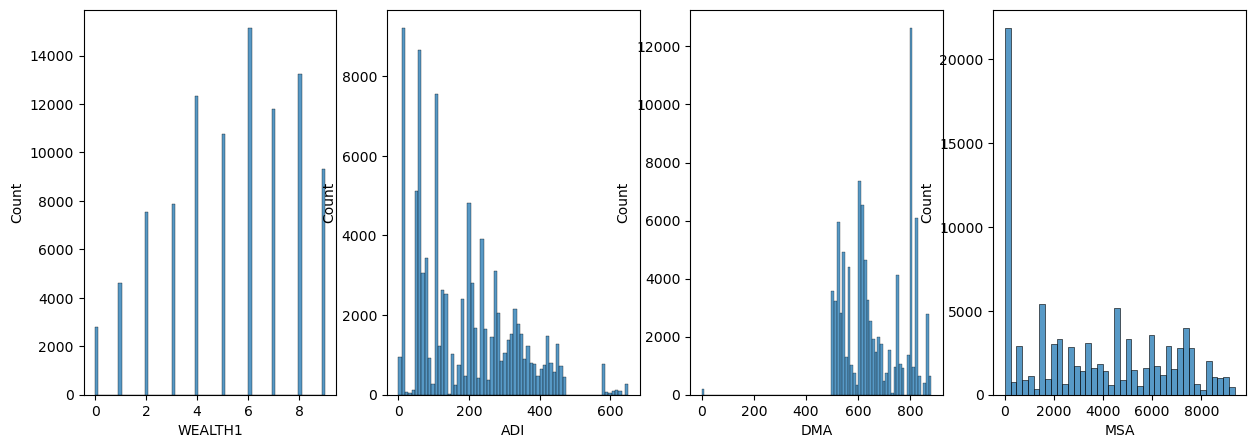

In [10]:
fig, ax = plt.subplots(1,4, figsize=(15,5))

for i, col in enumerate(['WEALTH1', 'ADI', 'DMA', 'MSA']):
    ax[i] = sns.histplot(data[col], ax=ax[i])